<a href="https://colab.research.google.com/github/arot4/libretasML-AROT/blob/main/AROT_ExamenRapido4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alan Raúl Ortiz Tanori

#1.- Encontrar b(y), η, T(y), a(η) de la familia exponencial para la distribución de Poisson.#

La distribución de Poisson pertenece a la familia exponencial. Para esta distribución:

- $b(y) = e^λ$
- $η = ln(λ)$
- T(y) = y
- $a(η) = e^η$

b(y): La función de masa de probabilidad de Poisson.

η: La función lineal de enlace inverso.

T(y): La estadística suficiente.

a(η): La función de enlace.



#2.- Encontrar la función de link inversa λ=f(η).#

$λ = e^η$

La función de link inverso λ es la exponencial de η.

#3.- Encontrar cómo calcular $\hat{y}^{(i)} = E[y^{(i)}|x^{(i)}; w,b]$ en función de X^(i), w, b.#

$\hat{y}^{(i)} = E[y^{(i)}|x^{(i)}; w,b] = e^{w^Tx^{(i)} + b}$



#4.- Usando el entero de máxima verosimilitud, encontrar la función de costo (pérdida) $E_{in}(λ)=E_{in}(w,b)=?$#

$E_{in}(w,b) = -\sum_{i=1}^{M} [y^{(i)}(w^Tx^{(i)} + b) - e^{w^Tx^{(i)} + b}]$


#5.- Derivar la regla de aprendizaje: ∂Ein(w,b)/∂wj, ∂Ein(w,b)/∂b.#

$\frac{\partial E_{in}(w,b)}{\partial w_j} = -\sum_{i=1}^{M} [x_j^{(i)}(y^{(i)} - e^{w^Tx^{(i)} + b})]
$

$\frac{\partial E_{in}(w,b)}{\partial b} = -\sum_{i=1}^{M} [y^{(i)} - e^{w^Tx^{(i)} + b}]
$


#6.- Encontrar la forma algorítmica para calcular: $\Delta w$, $\Delta b$ tal que#
#w<- w - $\alpha\Delta w$#
#b<- b - $\alpha\Delta b$#

$\Delta w_j = \alpha\sum_{i=1}^{M} [x_j^{(i)}(y^{(i)} - e^{w^Tx^{(i)} + b})]
$

$\Delta b = \alpha\sum_{i=1}^{M} [y^{(i)} - e^{w^Tx^{(i)} + b}]
$


#7.- Programar el algoritmo y hacer un caso ilustrativo (python).#

Pesos finales: [-325150.04338622 -269346.80092112]
Sesgo final: -2889342.557182451


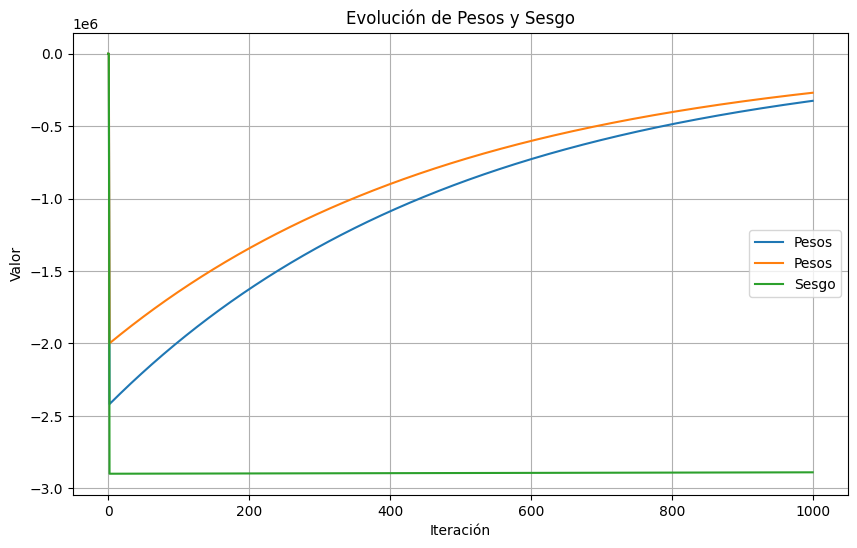

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos de ejemplo (puedes reemplazar esto con tus datos reales)
np.random.seed(0)
M = 100
n = 2
X = np.random.rand(M, n)
y = np.random.poisson(np.exp(X.dot(np.array([2, -1])) + 1.5))

# Inicializar pesos y sesgo
w = np.zeros(n)
b = 0.0

# Hiperparámetros
alpha = 0.01  # Tasa de aprendizaje
lambd = 0.1  # Parámetro de regularización
max_iter = 1000  # Número máximo de iteraciones

# Listas para almacenar los valores de pesos y sesgo en cada iteración
w_history = [w.copy()]
b_history = [b]

# Implementación del descenso de gradiente con regularización L2
for _ in range(max_iter):
    # Calcular el gradiente con regularización
    dw = -X.T.dot(y - np.exp(X.dot(w) + b)) + 2 * lambd * w
    db = -np.sum(y - np.exp(X.dot(w) + b))  # No se regulariza el sesgo

    # Actualizar pesos y sesgo
    w -= alpha * dw
    b -= alpha * db

    # Almacenar los valores de pesos y sesgo en cada iteración
    w_history.append(w.copy())
    b_history.append(b)

# Ahora tienes los pesos (w) y el sesgo (b) entrenados
print("Pesos finales:", w)
print("Sesgo final:", b)

# Gráfica para visualizar la evolución de los pesos y el sesgo
plt.figure(figsize=(10, 6))
plt.plot(w_history, label="Pesos")
plt.plot(b_history, label="Sesgo")
plt.xlabel("Iteración")
plt.ylabel("Valor")
plt.title("Evolución de Pesos y Sesgo")
plt.legend()
plt.grid(True)
plt.show()
